In [1]:
# Imports

import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import SGD
from keras.wrappers.scikit_learn import KerasRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV

import seaborn as sns

# Importing all libraries for processing the data before it can be modeled.
from statistics import mean
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# Importing all the classifiers that we are going to be implementing in this demo.
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.linear_model import LogisticRegression

# Importing the metrics we are going to be using to measure the results of the model.
from sklearn.metrics import accuracy_score

# The following statement is only applicable if you are running this test in juptyer notebook or Atom text editor with hydrogen plugin installed.
%matplotlib inline



from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from matplotlib.colors import ListedColormap
from sklearn.decomposition import PCA
from scipy.spatial.distance import cdist
%matplotlib inline

/Applications/anaconda/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
## Load the file
data = pd.read_csv("/Users/Asmita/Downloads/movie_metadata.csv")
data


,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,...,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,...,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0
2,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,...,994.0,English,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000
3,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,...,2701.0,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000
4,NaN,Doug Walker,NaN,NaN,131.0,NaN,Rob Walker,131.0,NaN,Documentary,...,NaN,NaN,NaN,NaN,NaN,NaN,12.0,7.1,NaN,0
5,Color,Andrew Stanton,462.0,132.0,475.0,530.0,Samantha Morton,640.0,73058679.0,Action|Adventure|Sci-Fi,...,738.0,English,USA,PG-13,263700000.0,2012.0,632.0,6.6,2.35,24000
6,Color,Sam Raimi,392.0,156.0,0.0,4000.0,James Franco,24000.0,336530303.0,Action|Adventure|Romance,...,1902.0,English,USA,PG-13,258000000.0,2007.0,11000.0,6.2,2.35,0
7,Color,Nathan Greno,324.0,100.0,15.0,284.0,Donna Murphy,799.0,200807262.0,Adventure|Animation|Comedy|Family|Fantasy|Musi...,...,387.0,English,USA,PG,260000000.0,2010.0,553.0,7.8,1.85,29000
8,Color,Joss Whedon,635.0,141.0,0.0,19000.0,Robert Downey Jr.,26000.0,458991599.0,Action|Adventure|Sci-Fi,...,1117.0,English,USA,PG-13,250000000.0,2015.0,21000.0,7.5,2.35,118000
9,Color,David Yates,375.0,153.0,282.0,10000.0,Daniel Radcliffe,25000.0,301956980.0,Adventure|Family|Fantasy|Mystery,...,973.0,English,UK,PG,250000000.0,2009.0,11000.0,7.5,2.35,10000


In [3]:
## Data Preprocessing and preliminary observations

data.shape

(5043, 28)

In [4]:
#Summary of missing values
data.isnull().sum()


color                         19
director_name                104
num_critic_for_reviews        50
duration                      15
director_facebook_likes      104
actor_3_facebook_likes        23
actor_2_name                  13
actor_1_facebook_likes         7
gross                        884
genres                         0
actor_1_name                   7
movie_title                    0
num_voted_users                0
cast_total_facebook_likes      0
actor_3_name                  23
facenumber_in_poster          13
plot_keywords                153
movie_imdb_link                0
num_user_for_reviews          21
language                      12
country                        5
content_rating               303
budget                       492
title_year                   108
actor_2_facebook_likes        13
imdb_score                     0
aspect_ratio                 329
movie_facebook_likes           0
dtype: int64

In [7]:
#replacing NaN in Numeric variables by mean value
data = data.fillna(data.mean())  
data.isnull().sum()

color                         19
director_name                104
num_critic_for_reviews         0
duration                       0
director_facebook_likes        0
actor_3_facebook_likes         0
actor_2_name                  13
actor_1_facebook_likes         0
gross                          0
genres                         0
actor_1_name                   7
movie_title                    0
num_voted_users                0
cast_total_facebook_likes      0
actor_3_name                  23
facenumber_in_poster           0
plot_keywords                153
movie_imdb_link                0
num_user_for_reviews           0
language                      12
country                        5
content_rating               303
budget                         0
title_year                     0
actor_2_facebook_likes         0
imdb_score                     0
aspect_ratio                   0
movie_facebook_likes           0
dtype: int64

In [14]:
#replacing NaN in character variables by mode value
for column in data[['color','language', 'country', 'content_rating']]:
    mode = data[column].mode()
    data[column] = data[column].fillna(mode)


In [15]:
#dropping remaining records having NaN
data = data.dropna(how='any')

In [17]:
#Summary of missing values
data.isnull().sum()


color                        0
director_name                0
num_critic_for_reviews       0
duration                     0
director_facebook_likes      0
actor_3_facebook_likes       0
actor_2_name                 0
actor_1_facebook_likes       0
gross                        0
genres                       0
actor_1_name                 0
movie_title                  0
num_voted_users              0
cast_total_facebook_likes    0
actor_3_name                 0
facenumber_in_poster         0
plot_keywords                0
movie_imdb_link              0
num_user_for_reviews         0
language                     0
country                      0
content_rating               0
budget                       0
title_year                   0
actor_2_facebook_likes       0
imdb_score                   0
aspect_ratio                 0
movie_facebook_likes         0
dtype: int64

In [18]:
data

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,Color,James Cameron,723.000000,178.0,0.0,855.0,Joel David Moore,1000.0,7.605058e+08,Action|Adventure|Fantasy|Sci-Fi,...,3054.0,English,USA,PG-13,2.370000e+08,2009.0,936.0,7.9,1.780000,33000
1,Color,Gore Verbinski,302.000000,169.0,563.0,1000.0,Orlando Bloom,40000.0,3.094042e+08,Action|Adventure|Fantasy,...,1238.0,English,USA,PG-13,3.000000e+08,2007.0,5000.0,7.1,2.350000,0
2,Color,Sam Mendes,602.000000,148.0,0.0,161.0,Rory Kinnear,11000.0,2.000742e+08,Action|Adventure|Thriller,...,994.0,English,UK,PG-13,2.450000e+08,2015.0,393.0,6.8,2.350000,85000
3,Color,Christopher Nolan,813.000000,164.0,22000.0,23000.0,Christian Bale,27000.0,4.481306e+08,Action|Thriller,...,2701.0,English,USA,PG-13,2.500000e+08,2012.0,23000.0,8.5,2.350000,164000
5,Color,Andrew Stanton,462.000000,132.0,475.0,530.0,Samantha Morton,640.0,7.305868e+07,Action|Adventure|Sci-Fi,...,738.0,English,USA,PG-13,2.637000e+08,2012.0,632.0,6.6,2.350000,24000
6,Color,Sam Raimi,392.000000,156.0,0.0,4000.0,James Franco,24000.0,3.365303e+08,Action|Adventure|Romance,...,1902.0,English,USA,PG-13,2.580000e+08,2007.0,11000.0,6.2,2.350000,0
7,Color,Nathan Greno,324.000000,100.0,15.0,284.0,Donna Murphy,799.0,2.008073e+08,Adventure|Animation|Comedy|Family|Fantasy|Musi...,...,387.0,English,USA,PG,2.600000e+08,2010.0,553.0,7.8,1.850000,29000
8,Color,Joss Whedon,635.000000,141.0,0.0,19000.0,Robert Downey Jr.,26000.0,4.589916e+08,Action|Adventure|Sci-Fi,...,1117.0,English,USA,PG-13,2.500000e+08,2015.0,21000.0,7.5,2.350000,118000
9,Color,David Yates,375.000000,153.0,282.0,10000.0,Daniel Radcliffe,25000.0,3.019570e+08,Adventure|Family|Fantasy|Mystery,...,973.0,English,UK,PG,2.500000e+08,2009.0,11000.0,7.5,2.350000,10000
10,Color,Zack Snyder,673.000000,183.0,0.0,2000.0,Lauren Cohan,15000.0,3.302491e+08,Action|Adventure|Sci-Fi,...,3018.0,English,USA,PG-13,2.500000e+08,2016.0,4000.0,6.9,2.350000,197000


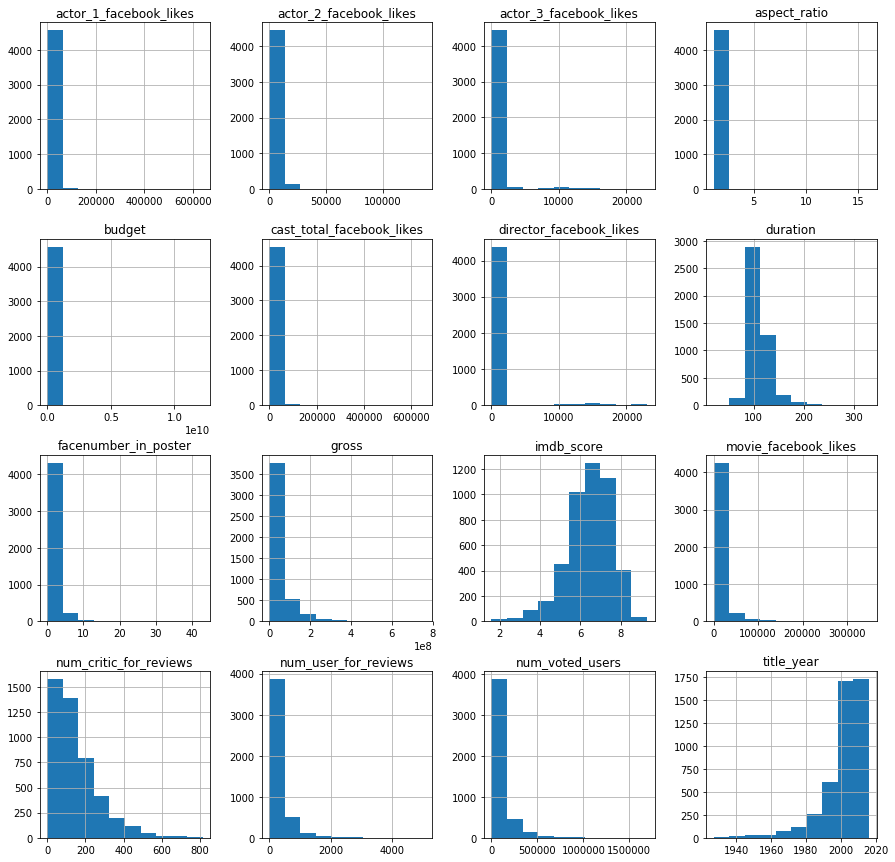

In [20]:
## 2. Data Exploration and Visualization

#Variables have roughly the same scale and unit, hence the need for Pre-Processing is eliminated
pd.DataFrame.hist(data, figsize = [15,15]);



Text(0.5,1,'imdb_score')

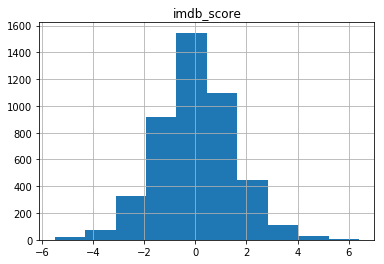

In [21]:
#histogram of imdb scores
data['imdb_score'].diff().hist()
plt.title("imdb_score")

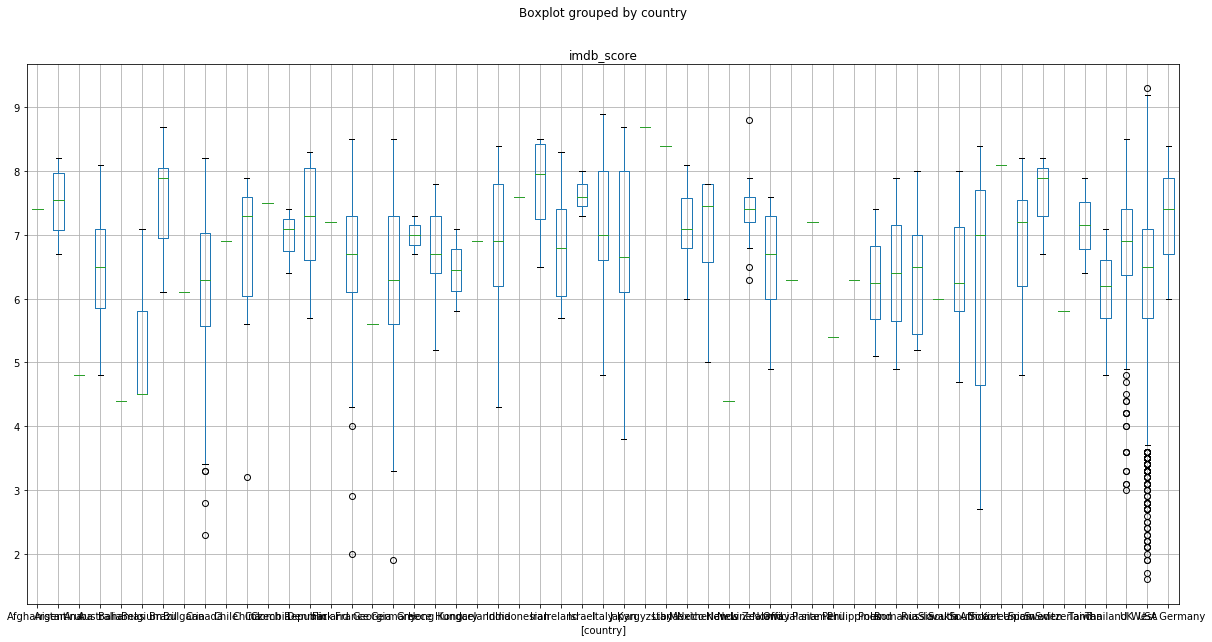

In [25]:
#imdb score vs country
df = data[['country','imdb_score']]
df.boxplot(by='country', figsize = [20,10])
plt.show()



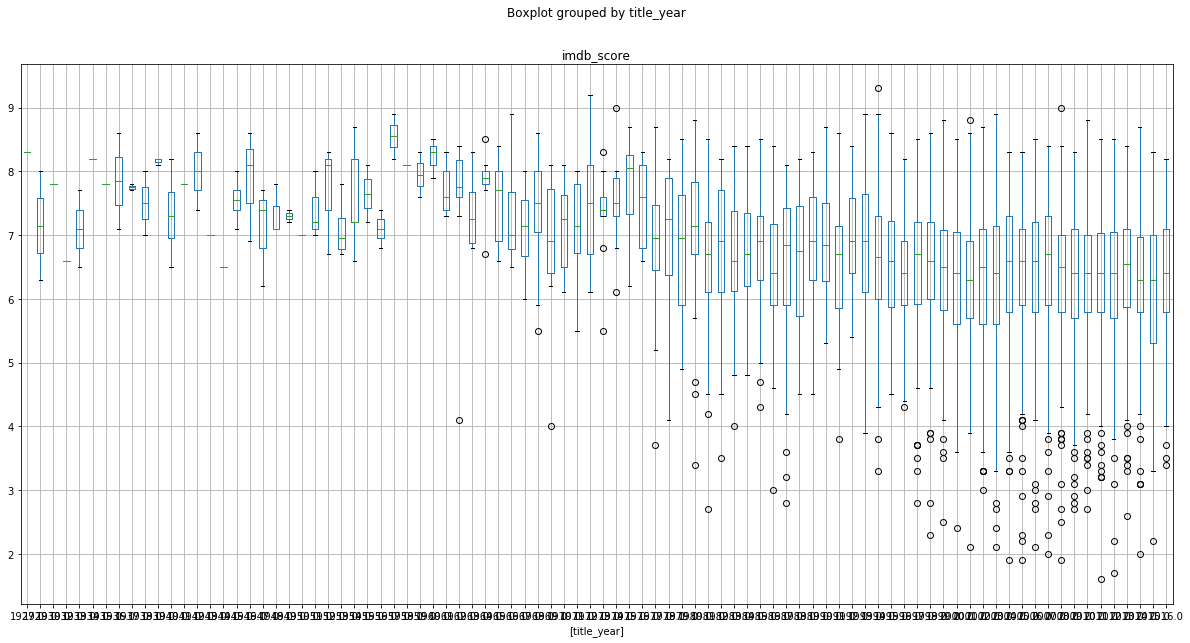

In [26]:
#imdb score vs year
df = data[['title_year','imdb_score']]
df.boxplot(by='title_year', figsize = [20,10])
plt.show()



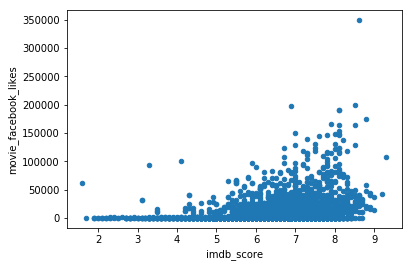

In [27]:
#imdb score vs movie facebook popularity
data.plot.scatter('imdb_score','movie_facebook_likes')

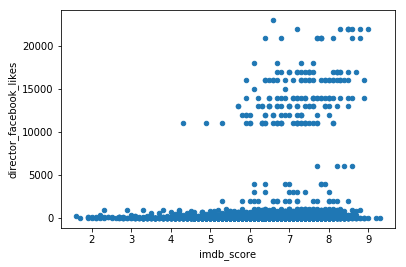

In [28]:
#imdb score vs director facebook popularity
data.plot.scatter('imdb_score','director_facebook_likes')

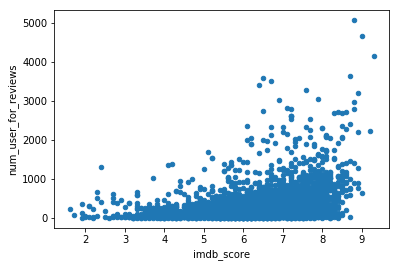

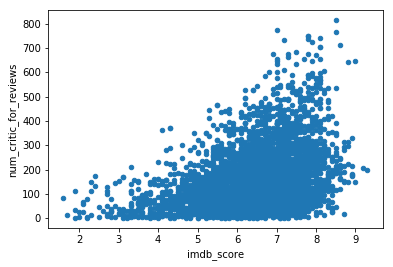

In [29]:
#imdb score vs user reviews and critic reviews
data.plot.scatter('imdb_score','num_user_for_reviews')
data.plot.scatter('imdb_score','num_critic_for_reviews')

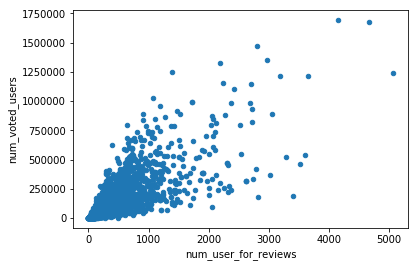

In [30]:
#voted users vs user reviews
data.plot.scatter('num_user_for_reviews','num_voted_users')

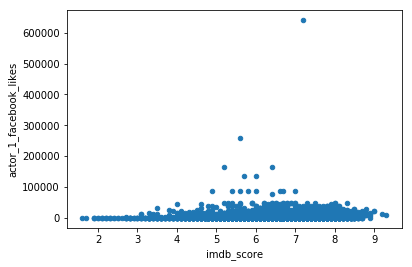

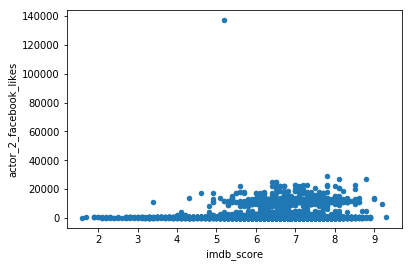

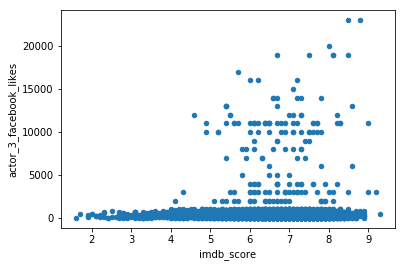

In [31]:
#imdb score vs 3 actors facebook popularity
data.plot.scatter('imdb_score','actor_1_facebook_likes')
data.plot.scatter('imdb_score','actor_2_facebook_likes')
data.plot.scatter('imdb_score','actor_3_facebook_likes')

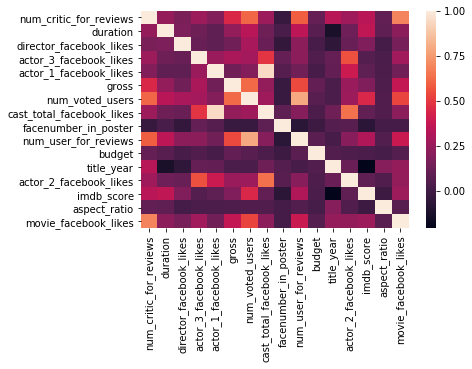

In [32]:
## seaborn heatmap

sns.heatmap(data.corr())

In [33]:
#dropping 'cast_total_facebook_likes' as 'cast_total_facebook_likes'-'actor_1_facebook_likes' are highly correlated
data = data.drop('cast_total_facebook_likes', axis=1)


In [34]:
#dropping 'num_user_for_reviews' as 'num_user_for_reviews'-'num_voted_users' are highly correlated
data = data.drop('num_user_for_reviews', axis=1)

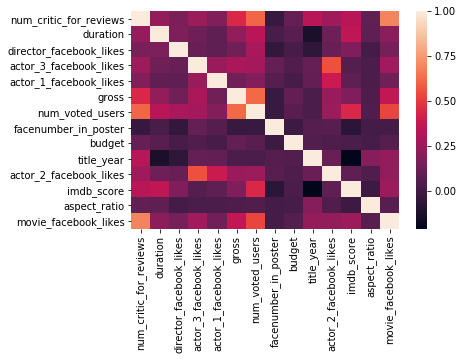

In [35]:
sns.heatmap(data.corr())

In [36]:
#selecting relevant variables
data = data[['num_critic_for_reviews','duration','director_facebook_likes','actor_3_facebook_likes','actor_1_facebook_likes',
                    'gross','num_voted_users','facenumber_in_poster','budget','aspect_ratio','actor_2_facebook_likes',
                              'movie_facebook_likes','title_year','imdb_score']]

In [37]:
data.shape


(4581, 14)

In [38]:
data

,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_1_facebook_likes,gross,num_voted_users,facenumber_in_poster,budget,aspect_ratio,actor_2_facebook_likes,movie_facebook_likes,title_year,imdb_score
0,723.000000,178.0,0.0,855.0,1000.0,7.605058e+08,886204,0.0,2.370000e+08,1.780000,936.0,33000,2009.0,7.9
1,302.000000,169.0,563.0,1000.0,40000.0,3.094042e+08,471220,0.0,3.000000e+08,2.350000,5000.0,0,2007.0,7.1
2,602.000000,148.0,0.0,161.0,11000.0,2.000742e+08,275868,1.0,2.450000e+08,2.350000,393.0,85000,2015.0,6.8
3,813.000000,164.0,22000.0,23000.0,27000.0,4.481306e+08,1144337,0.0,2.500000e+08,2.350000,23000.0,164000,2012.0,8.5
5,462.000000,132.0,475.0,530.0,640.0,7.305868e+07,212204,1.0,2.637000e+08,2.350000,632.0,24000,2012.0,6.6
6,392.000000,156.0,0.0,4000.0,24000.0,3.365303e+08,383056,0.0,2.580000e+08,2.350000,11000.0,0,2007.0,6.2
7,324.000000,100.0,15.0,284.0,799.0,2.008073e+08,294810,1.0,2.600000e+08,1.850000,553.0,29000,2010.0,7.8
8,635.000000,141.0,0.0,19000.0,26000.0,4.589916e+08,462669,4.0,2.500000e+08,2.350000,21000.0,118000,2015.0,7.5
9,375.000000,153.0,282.0,10000.0,25000.0,3.019570e+08,321795,3.0,2.500000e+08,2.350000,11000.0,10000,2009.0,7.5
10,673.000000,183.0,0.0,2000.0,15000.0,3.302491e+08,371639,0.0,2.500000e+08,2.350000,4000.0,197000,2016.0,6.9


In [39]:
## 3. Model Development and Evaluation

#split into input (X) and output (Y) variables
X = data.iloc[:, 0:12].values
Y = data.iloc[:, 12:13].values



In [40]:
X.shape

(4581, 12)

In [41]:
Y.shape

(4581, 1)

In [42]:
#define base model
def baseline_model(learn_rate=0.01, momentum=0):
    # create model
    model = Sequential()
    model.add(Dense(12, input_dim=12, kernel_initializer='normal', activation='relu'))
    model.add(Dense(1, kernel_initializer='normal', activation='relu'))
    # compile model
    optimizer = SGD(lr=learn_rate, momentum=momentum)
    model.compile(loss='mean_absolute_error', optimizer='adam')
    return model



In [43]:
#evaluate base model
np.random.seed(42)
#evaluate model with standardized dataset
estimator = KerasRegressor(build_fn=baseline_model, nb_epoch=10, batch_size=50, verbose=1)
#using 10-fold cross validation to evaluate the model
kfold = KFold(n_splits=10, random_state=42)
results = cross_val_score(estimator, X, Y, cv=kfold)
print("Results: %.2f (%.2f) MAE" % (results.mean(), results.std()))

Epoch 1/1
459/459 [==============================] - 0s 105us/step
Epoch 1/1
458/458 [==============================] - 0s 91us/step
Epoch 1/1
458/458 [==============================] - 0s 110us/step
Epoch 1/1
458/458 [==============================] - 0s 125us/step
Epoch 1/1
458/458 [==============================] - 0s 147us/step
Epoch 1/1
458/458 [==============================] - 0s 174us/step
Epoch 1/1
458/458 [==============================] - 0s 188us/step
Epoch 1/1
458/458 [==============================] - 0s 211us/step
Epoch 1/1
458/458 [==============================] - 0s 224us/step
Epoch 1/1
458/458 [==============================] - 0s 283us/step
Results: -2002.01 (2.83) MAE


##The scores returned by cross_val_score is negative because cross_val_score represents the larger the loss function 
the better the model. The actual MAE is simply the postive version of the number you're getting which means 
scores that are actually losses need to be negated.



In [44]:

#define larger model
#adding four more hidden layers to the base model
def larger_model(learn_rate=0.01, momentum=0):
    # create model
    model = Sequential()
    model.add(Dense(11, input_dim=12, kernel_initializer='normal', activation='relu'))
    model.add(Dense(9, input_dim=12, kernel_initializer='normal', activation='relu'))
    model.add(Dense(7, input_dim=12, kernel_initializer='normal', activation='relu'))
    model.add(Dense(4, input_dim=12, kernel_initializer='normal', activation='relu'))
    model.add(Dense(2, input_dim=12, kernel_initializer='normal', activation='relu'))
    model.add(Dense(1, kernel_initializer='normal', activation='relu'))
    # compile model
    optimizer = SGD(lr=learn_rate, momentum=momentum)
    model.compile(loss='mean_absolute_error', optimizer='adam')
    return model



In [45]:
#evaluate larger model
np.random.seed(42)
#evaluate model with standardized dataset
estimator = KerasRegressor(build_fn=larger_model, nb_epoch=10, batch_size=50, verbose=1)
#using 10-fold cross validation to evaluate the model
kfold = KFold(n_splits=10, random_state=42)
results = cross_val_score(estimator, X, Y, cv=kfold)
print("Results: %.2f (%.2f) MAE" % (results.mean(), results.std()))

Epoch 1/1
459/459 [==============================] - 0s 358us/step
Epoch 1/1
458/458 [==============================] - 0s 380us/step
Epoch 1/1
458/458 [==============================] - 0s 445us/step
Epoch 1/1
458/458 [==============================] - 0s 480us/step
Epoch 1/1
458/458 [==============================] - 0s 494us/step
Epoch 1/1
458/458 [==============================] - 0s 578us/step
Epoch 1/1
458/458 [==============================] - 0s 582us/step
Epoch 1/1
458/458 [==============================] - 0s 612us/step
Epoch 1/1
458/458 [==============================] - 0s 661us/step
Epoch 1/1
458/458 [==============================] - 0s 705us/step
Results: -1893.89 (206.43) MAE


In [46]:
#define wider model, nearly doubling the number of neurons in two hidden layers
def wider_model(learn_rate=0.01, momentum=0):
    # create model
    model = Sequential()
    model.add(Dense(26, input_dim=12, kernel_initializer='normal', activation='relu'))
    model.add(Dense(30, input_dim=12, kernel_initializer='normal', activation='relu'))
    model.add(Dense(1, kernel_initializer='normal', activation='relu'))
    # compile model
    optimizer = SGD(lr=learn_rate, momentum=momentum)
    model.compile(loss='mean_absolute_error', optimizer='adam')
    return model

In [47]:
#evaluate wider model
np.random.seed(42)
#evaluate model with standardized dataset
estimator = KerasRegressor(build_fn=wider_model, nb_epoch=10, batch_size=50, verbose=1)
#using 10-fold cross validation to evaluate the model
kfold = KFold(n_splits=10, random_state=42)
results = cross_val_score(estimator, X, Y, cv=kfold)
print("Results: %.2f (%.2f) MAE" % (results.mean(), results.std()))

Epoch 1/1
459/459 [==============================] - 0s 717us/step
Epoch 1/1
458/458 [==============================] - 0s 744us/step
Epoch 1/1
458/458 [==============================] - 0s 772us/step
Epoch 1/1
458/458 [==============================] - 0s 844us/step
Epoch 1/1
458/458 [==============================] - 0s 841us/step
Epoch 1/1
458/458 [==============================] - 0s 854us/step
Epoch 1/1
458/458 [==============================] - 0s 923us/step
Epoch 1/1
458/458 [==============================] - 0s 1ms/step
Epoch 1/1
458/458 [==============================] - 0s 1ms/step
Epoch 1/1
458/458 [==============================] - 0s 1ms/step
Results: -2002.01 (2.83) MAE


In [ ]:




# In[39]:




# In[159]:

## Conclusion
1.The model having more number of hidden layers is performing better than the model having more number of neurons. 
2.Director facebook likes and actors facebook likes matter. There is not much gain from adding the categorical and 
the keywords variables.
3.I have removed the correlated variables as I wanted to reduce the number of variables for the fitting to happen 
in a reasonable amount of time


# In[ ]:

## Future Improvement
1.I happened to run my models a few times (without poster information, with plot_keywords, and without directors) but still 
unable to minimize the error, I believe it might be possible with some external data.
2.Working more on data preprocessing, feature engineering and adding hyperparameter values.
3.Researching and exploring more about Deep Learning and Neural Networks.
